In [1]:
import graphlab
data = graphlab.SFrame.read_json("/Users/Jack/Documents/AIT/Data Mining/Data/train.json")

A newer version of GraphLab Create (v1.7.1) is available! Your current version is v1.6.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.
[INFO] This non-commercial license of GraphLab Create is assigned to jmuller17@amherst.edu and will expire on November 16, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-7208 - Server binary: /Users/Jack/.graphlab/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1449593628.log
[INFO] GraphLab Server Version: 1.6.1


PROGRESS: Finished parsing file /Users/Jack/Documents/AIT/Data Mining/Data/train.json
PROGRESS: Parsing completed. Parsed 1 lines in 1.08475 secs.


In [3]:
data.head()


cuisine,id,ingredients
greek,10259,"[romaine lettuce, blackolives, grape tomatoes, ..."
southern_us,25693,"[plain flour, groundpepper, salt, tomatoes, ..."
filipino,20130,"[eggs, pepper, salt,mayonaise, cooking oil, ..."
indian,22213,"[water, vegetable oil,wheat, salt] ..."
indian,13162,"[black pepper, shallots,cornflour, cayenne ..."
jamaican,6602,"[plain flour, sugar,butter, eggs, fresh ..."
spanish,42779,"[olive oil, salt, mediumshrimp, pepper, garlic, ..."
italian,3735,"[sugar, pistachio nuts,white almond bark, fl ..."
mexican,16903,"[olive oil, purple onion,fresh pineapple, pork, ..."
italian,12734,"[chopped tomatoes, freshbasil, garlic, extra- ..."


In [7]:
data.show()

Canvas is updated and available in a tab in the default browser.


In [4]:
import operator
def cuisineIngredientsDict():
    cuisineDict = {}
    for i in data:
        if i['cuisine'] not in cuisineDict:
            cuisineDict[i['cuisine']] = {}
        for x in i['ingredients']:
            if x not in cuisineDict[i['cuisine']]:
                cuisineDict[i['cuisine']][x] = 1
            else:
                cuisineDict[i['cuisine']][x] += 1
    for i in cuisineDict:
        cuisineDict[i] = sorted(cuisineDict[i].items(), key=operator.itemgetter(1), reverse=True)
    return cuisineDict


In [5]:
cuisineI = cuisineIngredientsDict()


# Cleaning Ingredients

In [ ]:
import numpy as np
import re
import operator
import os
import nltk
import pandas as pd 
from pandas import DataFrame, Series 
from nltk.stem import WordNetLemmatizer


In [3]:
recipe_df = pd.read_json('/Users/Jack/Documents/AIT/Data Mining/Data/train.json')
ingredients = recipe_df['ingredients']

In [4]:
replace = ['chopped','mixed', 'juice', 'juiced', 'peeled', 'diced', 'crushed', 'dried', 'minced',
           'stewed', 'whole', 'and', 'grated', 'shredded', 'ground', 'leaves', 'fresh', 'plain',
          'all-purpose', 'frozen', 'pods', 'seed', 'seeds', 'root', 'sea','powder',
          'light', 'dark', 'whole-milk', 'salt', 'large', 'breasts', 'breast', 'thighs', 'thigh',
          'drumsticks','legs', 'leg', 'rack', 'racks', 'sliced', 'dry', 'heavy', 'unsalted',
          'halves', 'skinless', 'boneless', 'fat', 'free', 'sodium', 'low', 'lean', 'fillets',
          'baby', 'leaf', 'chees', 'medium', 'crumbles','le', 'bulb', 'boil', '%', 'softened',
          'instant', 'granulated']

In [5]:
ingredients = [[nltk.word_tokenize(i) for i in x] for x in ingredients]

In [6]:
ingredients = [[[j for j in i if j not in replace] for i in x] for x in ingredients]
ingredients = [filter(None,x) for x in ingredients]

In [7]:
stem = WordNetLemmatizer()
ingredients = [[[stem.lemmatize(j) for j in i] for i in x] for x in ingredients]
ingredients = [[[j for j in i if not j.isdigit()] for i in x] for x in ingredients]

In [8]:
ingredients = [[" ".join(i) for i in x] for x in ingredients]

In [9]:
temp = graphlab.SArray(data=ingredients, dtype=list)
tf = graphlab.text_analytics.tf_idf(temp)

In [10]:
data.add_column(temp)

cuisine,id,ingredients,X4
greek,10259,"[romaine lettuce, blackolives, grape tomatoes, ...","[romaine lettuce, blackolive, grape tomato, ..."
southern_us,25693,"[plain flour, groundpepper, salt, tomatoes, ...","[flour, pepper, tomato,black pepper, thyme, ..."
filipino,20130,"[eggs, pepper, salt,mayonaise, cooking oil, ...","[egg, pepper, mayonaise,cooking oil, green ..."
indian,22213,"[water, vegetable oil,wheat, salt] ...","[water, vegetable oil,wheat] ..."
indian,13162,"[black pepper, shallots,cornflour, cayenne ...","[black pepper, shallot,cornflour, cayenne ..."
jamaican,6602,"[plain flour, sugar,butter, eggs, fresh ...","[flour, sugar, butter,egg, ginger, cinnamon, ..."
spanish,42779,"[olive oil, salt, mediumshrimp, pepper, garlic, ...","[olive oil, shrimp,pepper, garlic, cilan ..."
italian,3735,"[sugar, pistachio nuts,white almond bark, fl ...","[sugar, pistachio nut,white almond bark, fl ..."
mexican,16903,"[olive oil, purple onion,fresh pineapple, pork, ...","[olive oil, purple onion,pineapple, pork, poblano ..."
italian,12734,"[chopped tomatoes, freshbasil, garlic, extra- ...","[tomato, basil, garlic,extra-virgin olive oil, ..."


In [11]:
data.rename({'X4':'clean_ingredients'})

cuisine,id,ingredients,clean_ingredients
greek,10259,"[romaine lettuce, blackolives, grape tomatoes, ...","[romaine lettuce, blackolive, grape tomato, ..."
southern_us,25693,"[plain flour, groundpepper, salt, tomatoes, ...","[flour, pepper, tomato,black pepper, thyme, ..."
filipino,20130,"[eggs, pepper, salt,mayonaise, cooking oil, ...","[egg, pepper, mayonaise,cooking oil, green ..."
indian,22213,"[water, vegetable oil,wheat, salt] ...","[water, vegetable oil,wheat] ..."
indian,13162,"[black pepper, shallots,cornflour, cayenne ...","[black pepper, shallot,cornflour, cayenne ..."
jamaican,6602,"[plain flour, sugar,butter, eggs, fresh ...","[flour, sugar, butter,egg, ginger, cinnamon, ..."
spanish,42779,"[olive oil, salt, mediumshrimp, pepper, garlic, ...","[olive oil, shrimp,pepper, garlic, cilan ..."
italian,3735,"[sugar, pistachio nuts,white almond bark, fl ...","[sugar, pistachio nut,white almond bark, fl ..."
mexican,16903,"[olive oil, purple onion,fresh pineapple, pork, ...","[olive oil, purple onion,pineapple, pork, poblano ..."
italian,12734,"[chopped tomatoes, freshbasil, garlic, extra- ...","[tomato, basil, garlic,extra-virgin olive oil, ..."


# Checking data for Power Law Distribution

In [12]:
import itertools, collections
counter = collections.Counter(itertools.chain(*data['clean_ingredients']))
counter

Counter({'garlic': 11168, 'onion': 10246, 'olive oil': 7972, 'butter': 7697, 'black pepper': 7627, 'water': 7459, 'sugar': 7283, 'garlic clove': 7110, 'egg': 6360, 'flour': 6134, 'tomato': 6086, 'cilantro': 5662, 'ginger': 5187, 'chicken': 5140, 'pepper': 4824, 'cumin': 4635, 'vegetable oil': 4385, 'soy sauce': 4380, 'lemon': 4319, 'lime': 3954, 'green onion': 3550, 'carrot': 3188, 'milk': 3169, 'kosher': 3113, 'parmesan cheese': 2815, 'basil': 2807, 'extra-virgin olive oil': 2747, 'parsley': 2649, 'oregano': 2633, 'chicken broth': 2285, 'brown sugar': 2244, 'chili': 2230, 'thyme': 2221, 'coriander': 2152, 'sesame oil': 1974, 'oil': 1970, 'red bell pepper': 1939, 'cinnamon': 1927, 'shrimp': 1902, 'bay': 1896, 'purple onion': 1896, 'scallion': 1891, 'red pepper': 1822, 'corn starch': 1757, 'baking': 1738, 'jalapeno chilies': 1730, 'cayenne pepper': 1662, 'beef': 1605, 'sour cream': 1594, 'white wine': 1585, 'celery': 1508, 'shallot': 1500, 'cooking spray': 1490, 'cream': 1454, 'green be

In [13]:
c_list = sorted(counter.items(), key=operator.itemgetter(1), reverse=True)
frequency = collections.Counter(elem[1] for elem in c_list)


In [14]:
ingr_count = [int(x[1]) for x in c_list]
ingredients = [x[0] for x in c_list]
freq_count = [frequency[i] for i in ingr_count]


In [15]:

ingr_count = np.array(ingr_count)
freq_count = np.array(freq_count)


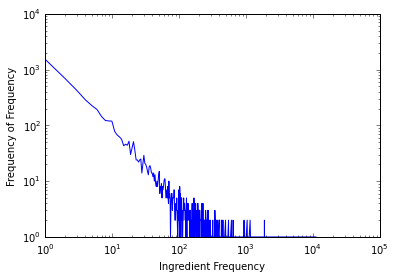

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.loglog(ingr_count,freq_count)
plt.xlabel("Ingredient Frequency")
plt.ylabel("Frequency of Frequency")

In [17]:
ingr_count

array([11168, 10246,  7972, ...,     1,     1,     1])

In [18]:
recipe = np.array(data['clean_ingredients'])
labels = np.array(data['cuisine'])

In [19]:
thousand_labels = labels[:1000]

In [ ]:
## I'm using the first 1500 most frequent ingredients right now

In [20]:
# The numpy array of the most frequent 1000 terms
# replace 1000 recipes with len(data)
frequency_matrix = np.zeros((len(data),1500))
i=0
for ingredient_list in recipe:
    j=0
    for ingr in ingredients[:1500]:
        if ingr in ingredient_list:
            frequency_matrix[i,j]=1
        j+=1
    i+=1


In [21]:
from sklearn import svm
from sklearn import metrics
from sklearn.cross_validation import train_test_split



## This is the order of cuisines for the columns and rows in the confusion matrix

In [22]:
cuisines = []
for cuisine in data['cuisine']:
    if cuisine not in cuisines:
        cuisines.append(cuisine)
cuisines

['greek',
 'southern_us',
 'filipino',
 'indian',
 'jamaican',
 'spanish',
 'italian',
 'mexican',
 'chinese',
 'british',
 'thai',
 'vietnamese',
 'cajun_creole',
 'brazilian',
 'french',
 'japanese',
 'irish',
 'korean',
 'moroccan',
 'russian']

### You don't need to run these next two cells. They compute the accuracy for selecting one cuisine not 20. (for instance Greek or not Greek)

In [43]:
clf = svm.SVC(kernel='linear',probability=True)
positive = 0
negative = 0
for cuisine in cuisines:
    y = data['cuisine'][:1000] == cuisine
    data_train, data_test, labels_train, labels_test = train_test_split(frequency_matrix, y, test_size=0.33, random_state=42)
    clf.fit(data_train, labels_train)
    predict = clf.predict_proba(data_test)
    positive += metrics.roc_auc_score(labels_test, predict[:,1])
    negative += metrics.roc_auc_score(labels_test, predict[:,0])
    print "\n"+cuisine
    print metrics.roc_auc_score(labels_test, predict[:,1])
    print metrics.roc_auc_score(labels_test, predict[:,0])
positive = positive/20
negative = negative/20
print "\nAveraged Linear:\n"
print "positive: "+str(positive)
print "negative: "+str(negative)



greek
0.96771340115
0.0322865988501

southern_us
0.906754098361
0.0932459016393

filipino
0.61390625
0.38609375

indian
0.924836601307
0.0751633986928

jamaican
0.759259259259
0.240740740741

spanish
0.76670128072
0.23329871928

italian
0.886422503108
0.113577496892

mexican
0.928403431101
0.0715965688987

chinese
0.915632754342
0.0843672456576

british
0.588456435206
0.411543564794

thai
0.859053497942
0.140946502058

vietnamese
0.885093167702
0.114906832298

cajun_creole
0.942975006066
0.0570249939335

brazilian
0.708460754332
0.291539245668

french
0.666271788797
0.333728211203

japanese
0.679012345679
0.320987654321

irish
0.835076923077
0.164923076923

korean
0.789570230608
0.210429769392

moroccan
0.796992481203
0.203007518797

russian
0.611963190184
0.388036809816

Averaged Linear:

positive: 0.801627770007
negative: 0.198372229993


In [37]:
clf = svm.SVC(kernel='rbf',probability=True)
positive = 0
negative = 0
for cuisine in cuisines:
    y = data['cuisine'][:1000] == cuisine
    data_train, data_test, labels_train, labels_test = train_test_split(frequency_matrix, y, test_size=0.33, random_state=42)
    clf.fit(data_train, labels_train)
    predict = clf.predict_proba(data_test)
    positive += metrics.roc_auc_score(labels_test, predict[:,1])
    negative += metrics.roc_auc_score(labels_test, predict[:,0])
    print "\n"+cuisine
    print metrics.roc_auc_score(labels_test, predict[:,1])
    print metrics.roc_auc_score(labels_test, predict[:,0])
positive = positive/20
negative = negative/20
print "\nAveraged rbf:\n"
print "positive: "+str(positive)
print "negative: "+str(negative)


greek
0.965944272446
0.0340557275542

southern_us
0.873836065574
0.126163934426

filipino
0.611875
0.388125

indian
0.923883442266
0.0761165577342

jamaican
0.792695473251
0.207304526749

spanish
0.751124956732
0.248875043268

italian
0.904216742644
0.095783257356

mexican
0.946734919757
0.0532650802435

chinese
0.949293343403
0.0507066565973

british
0.588677576294
0.411322423706

thai
0.902263374486
0.0977366255144

vietnamese
0.875194099379
0.124805900621

cajun_creole
0.931327347731
0.0686726522689

brazilian
0.625891946993
0.374108053007

french
0.687933660518
0.312066339482

japanese
0.712962962963
0.287037037037

irish
0.844923076923
0.155076923077

korean
0.796907756813
0.203092243187

moroccan
0.81512605042
0.18487394958

russian
0.710889570552
0.289110429448

Averaged rbf:

positive: 0.810585081957
negative: 0.189414918043


## this runs the svm.svc classifier. The clf.fit and predict cells take about 10 mins to run right now.

In [23]:
clf = svm.SVC(kernel='linear')

In [24]:
data_train, data_test, labels_train, labels_test = train_test_split(frequency_matrix, labels, test_size=0.33, random_state=42)

In [25]:
clf.fit(data_train, labels_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
predict = clf.predict(data_test)


#### It might be interesting to see what cuisines were often mistaken for another cuisine. 

In [27]:
metrics.confusion_matrix(labels_test,predict)


array([[  94,    3,    5,    1,    7,    4,    0,    1,    1,    6,    0,
           0,    0,   20,    1,    0,   14,    4,    3,    0],
       [   1,  103,    2,    0,    1,   52,    0,    6,   23,   25,    0,
           3,    0,    3,    0,    6,   45,    1,    0,    0],
       [   5,    5,  352,    2,    5,   16,    2,    0,    4,   26,    1,
           0,    0,   16,    0,    3,   86,    7,    0,    0],
       [   1,    1,    3,  690,   20,    6,    1,    2,    0,   14,    2,
          31,   14,    7,    1,    0,    9,    1,   15,   17],
       [   7,    1,    2,   34,  127,    6,    0,    2,    2,    4,    2,
           4,    1,   11,    0,    1,   12,    2,    1,    6],
       [   0,   25,   15,    2,    6,  558,    7,    2,   20,  168,    3,
           1,    0,    9,    0,    9,   69,   17,    0,    0],
       [   0,    1,    0,    0,    2,   15,  265,    2,    0,   68,    1,
           0,    1,    2,    5,    2,    6,   12,    0,    0],
       [   0,    3,    1,    3,    2,   1

In [28]:
metrics.accuracy_score(labels_test,predict)


0.75140941642541526

# We could also try: random forest, naive bayes, bagging. 